In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import itertools as it
import util
import pandas as pd
from world import World 

#### Snippet
The next cell is meant to help with the intuition behind the updating of the distribution for prediction.

In [2]:
alpha = [2,3,2]
beta  = [3,3,3]
world = [0,1,1]
possible_priors = np.linspace(0,1,100)
pp = possible_priors+0.01
print("a:", alpha)
print("b:", beta)
prior_dist = [sp.beta.cdf(x=possible_priors+.001, a=alpha[i], b=beta[i]) - sp.beta.cdf(x=possible_priors, a=alpha[i], b=beta[i]) for i in range(3)]
world_pred = [np.argmax(prior_dist[i])/100 for i in range(3)]
print("resulting prediction:", world_pred)
print("---")
print("world:", world)
alpha = [x + y for x, y in zip(alpha, world)]
print("new a:", alpha)
beta = [x - y + 1 for x, y in zip(beta, world)]
print("new b:", beta)
likelihood_dist = [sp.binom.pmf(k=alpha[i], n=len(world)+2, p=possible_priors) for i in range(3)]
posterior_dist = [prior_dist[i]*likelihood_dist[i] for i in range(len(prior_dist))]
norm_posterior_dist = [p/sum(p) for p in posterior_dist]
world_pred = [np.argmax(norm_posterior_dist[i])/100 for i in range(3)]
print("new pred:", world_pred)

a: [2, 3, 2]
b: [3, 3, 3]
resulting prediction: [0.33, 0.49, 0.33]
---
world: [0, 1, 1]
new a: [2, 4, 3]
new b: [4, 3, 3]
new pred: [0.37, 0.66, 0.49]


#### Let's Compare the "Bayesian" Agents to the Others
First we will use a "semi" bayesian agent that only predicts other's behaviors using the beta distribution, but uses the old sigmoid method for "predicting" the expectations of others.

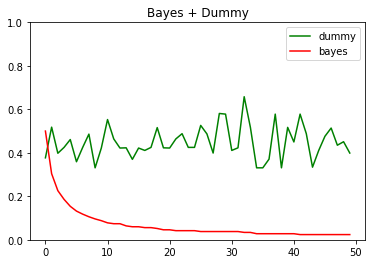

In [3]:
world = World(state_size =10, time =50, agent=["dummy", "semi_bayes"], memory=[20, 20], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Dummy")
plt.show()

### Predictability
Predictability scores range from 0 to 1, with 1 indicating that on average priors are close to 0 or 1.
```
predictability = [(abs(p - 0.5))*2 for p in self.b_priors]
score = sum(predictability)/len(predictability)
```

In the first example, see that the dummy is perfectly predictable as its priors are a static set of 1's and 0's.

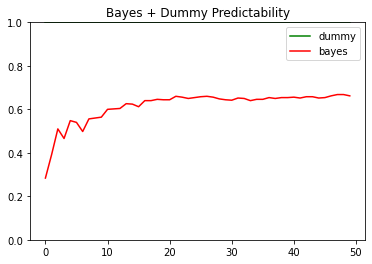

In [4]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Dummy Predictability")
plt.show()

#### Manipulating Memory
Bayesian and Sigmoid agents seem to outperform each other depending on whether or not memory is used by the sigmoid agent.

/Applications/anaconda3/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


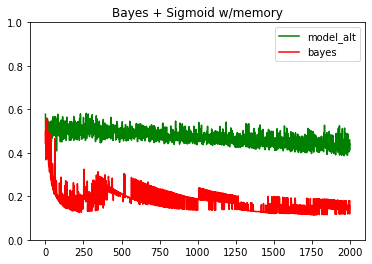

In [5]:
world = World(state_size =10, time =2000, agent=["model_alt", "semi_bayes"], memory=[30, 30], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Sigmoid w/memory")
plt.show()

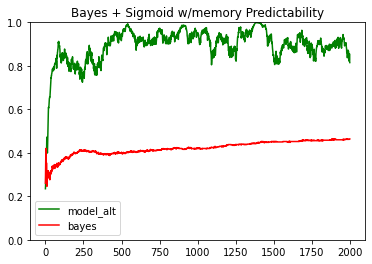

In [6]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Sigmoid w/memory Predictability")
plt.show()

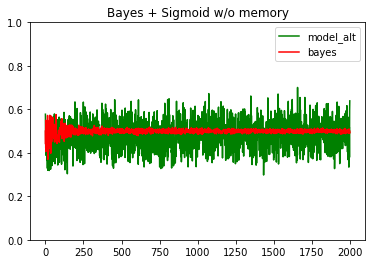

In [7]:
world = World(state_size =10, time =2000, agent=["model_alt", "semi_bayes"], memory=[0, 0], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Sigmoid w/o memory")
plt.show()

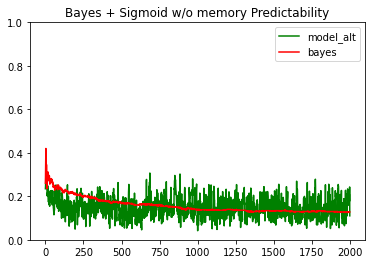

In [8]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Sigmoid w/o memory Predictability")
plt.show()

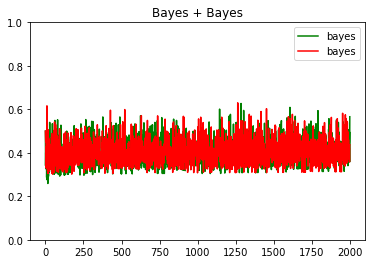

In [9]:
world = World(state_size =10, time =2000, agent=["semi_bayes", "semi_bayes"], memory=[0, 0], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Semi-Bayes")
plt.show()

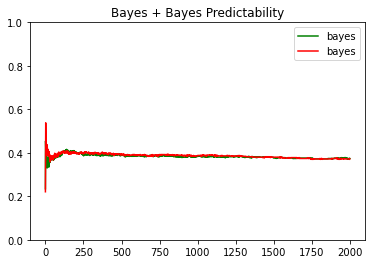

In [10]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Semi-Bayes + Semi-Bayes Predictability")
plt.show()

### Thoughts
The Bayesian agent doesn't use memory or error signals in it's prediction at all. Because the sigmoid agent uses memory both in adjusting it's predictions of the other's priors and attention (factor in adjusting priors), it looks like the impact of memory on attention leads to more predictable priors. If you look at the experiment "Bayes + Sigmoid w/o memory", you can see that at around t = 250, there is a spike in error that significantly negatively impacts predictability. It seems as though less memory in the attention model increases the sigmoid agent's sensitivity to error when adjusting its priors. This is a problem for the bayesian agent that considers its entire history of observations and cannot cope with drastic updates to priors. The more stable the prior remains, the more easily the bayesian agent can estimate the prior (becomes more confident). 


 bayes = blue, sigmoid model = green


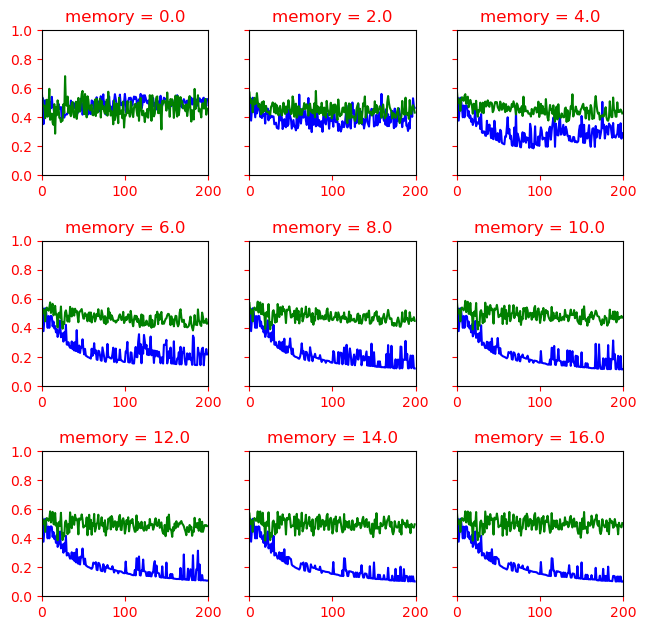

In [11]:
w = 2.5; h = 2.5
ncols = 3
nrows = 3
param_vals = [i for i in range(0, 18, 2)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 200
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["semi_bayes", "model_alt"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0], 'b')
    ax[ai].plot(time, costs[1], 'g')
    ax[ai].set_title('memory = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n bayes = blue, sigmoid model = green")
plt.show()

### Full Bayes
Let's try the same experiments as before except with the bayesian agents updating their priors using a beta distribution based on their own behaviors.

What you'll see is that, generally, priors coonverge and remain stable, but predictability does not improve, keeping error high, but estimates likely quite accurate. 

In [ ]:
world = World(state_size =10, time =50, agent=["dummy", "bayes"], memory=[20, 20], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Dummy")
plt.show()

In [ ]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Dummy Predictability")
plt.show()

In [ ]:
world = World(state_size =10, time =2000, agent=["model_alt", "bayes"], memory=[30, 30], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Sigmoid w/memory")
plt.show()

In [ ]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Sigmoid w/memory Predictability")
plt.show()

In [ ]:
world = World(state_size =10, time =2000, agent=["model_alt", "bayes"], memory=[0, 0], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Sigmoid w/o memory")
plt.show()

In [ ]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Sigmoid w/o memory Predictability")
plt.show()

In [ ]:
world = World(state_size =10, time =2000, agent=["bayes", "bayes"], memory=[0, 0], behav_control=[1, 1], seed=7)

world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
predictability = world.get_predictability()

time = [t for t in range(len(costs[0]))]
#m_m_world.print_results()

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'g', label=agents[0])
plt.plot(time, costs[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Bayes")
plt.show()

In [ ]:
plt.figure(facecolor='white') 
plt.plot(time, predictability[0], 'g', label=agents[0])
plt.plot(time, predictability[1], 'r', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Bayes + Bayes Predictability")
plt.show()

In [ ]:
w = 2.5; h = 2.5
ncols = 3
nrows = 3
param_vals = [i for i in range(0, 18, 2)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
t = 200
time = [i for i in range(t)]

for ix, param in enumerate(param_vals):
    # experiments
    world = World(state_size = 10, time = t, agent=["bayes", "model_alt"], memory=[param, param], behav_control=[1, 1], seed=7)
    world.create_agents()
    world.run()
    agents = world.get_agents()
    errors = world.get_errors()
    preds = world.get_pred()
    priors = world.get_behav_priors()
    costs = world.get_costs()

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, costs[0], 'b')
    ax[ai].plot(time, costs[1], 'g')
    ax[ai].set_title('memory = %.1f'%param, color='red')
    ax[ai].set_xlim(0,t)
    ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x', colors='red')
    ax[ai].tick_params(axis='y', colors='red')

print("\n bayes = blue, sigmoid model = green")
plt.show()